In [29]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn .svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Conv1D, ReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import backend as K

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [30]:
# loading dataset for further analysis
df=pd.read_csv("/content/Horizontal Photovoltaic Output Power.csv")

In [31]:
# EDA analysis and get to know our dataset columns and features
df.head()

Location      Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  \
0  Camp Murray  20171203  1145     47.11    -122.57        84  2.017120e+11   
1  Camp Murray  20171203  1315     47.11    -122.57        84  2.017120e+11   
2  Camp Murray  20171203  1330     47.11    -122.57        84  2.017120e+11   
3  Camp Murray  20171204  1230     47.11    -122.57        84  2.017120e+11   
4  Camp Murray  20171204  1415     47.11    -122.57        84  2.017120e+11   

   Month  Hour  Season  Humidity  AmbientTemp  PolyPwr  Wind.Speed  \
0     12    11  Winter  81.71997     12.86919  2.42769           5   
1     12    13  Winter  96.64917      9.66415  2.46273           0   
2     12    13  Winter  93.61572     15.44983  4.46836           5   
3     12    12  Winter  77.21558     10.36659  1.65364           5   
4     12    14  Winter  54.80347     16.85471  6.57939           3   

   Visibility  Pressure  Cloud.Ceiling  
0        10.0    1010.6            722  
1        10.0    1011.3             23  
2        10.0    1011.6             32  
3         2.0    1024.4              6  
4         3.0    1023.7              9

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [33]:
df.shape

(21045, 17)

In [34]:
df.describe().T

count          mean           std           min  \
Date           21045.0  2.017720e+07  4.579585e+03  2.017052e+07   
Time           21045.0  1.267484e+03  1.676028e+02  1.000000e+03   
Latitude       21045.0  3.821382e+01  6.323761e+00  2.089000e+01   
Longitude      21045.0 -1.085937e+02  1.636413e+01 -1.564400e+02   
Altitude       21045.0  7.988437e+02  7.706818e+02  1.000000e+00   
YRMODAHRMI     21045.0  2.017718e+11  4.579846e+07  2.017050e+11   
Month          21045.0  6.565883e+00  2.983958e+00  1.000000e+00   
Hour           21045.0  1.262785e+01  1.672952e+00  1.000000e+01   
Humidity       21045.0  3.712194e+01  2.382301e+01  0.000000e+00   
AmbientTemp    21045.0  2.928512e+01  1.236682e+01 -1.998177e+01   
PolyPwr        21045.0  1.297858e+01  7.123255e+00  2.573300e-01   
Wind.Speed     21045.0  1.031832e+01  6.385030e+00  0.000000e+00   
Visibility     21045.0  9.700071e+00  1.351949e+00  0.000000e+00   
Pressure       21045.0  9.259447e+02  8.521566e+01  7.817000e+02   
Cloud.Ceiling  21045.0  5.159668e+02  3.019034e+02  0.000000e+00   

                        25%           50%           75%           max  
Date           2.017111e+07  2.018032e+07  2.018062e+07  2.018100e+07  
Time           1.100000e+03  1.300000e+03  1.400000e+03  1.545000e+03  
Latitude       3.816000e+01  3.895000e+01  4.115000e+01  4.752000e+01  
Longitude     -1.172600e+02 -1.111800e+02 -1.047100e+02 -8.011000e+01  
Altitude       2.000000e+00  4.580000e+02  1.370000e+03  1.947000e+03  
YRMODAHRMI     2.017110e+11  2.018030e+11  2.018060e+11  2.018100e+11  
Month          4.000000e+00  7.000000e+00  9.000000e+00  1.200000e+01  
Hour           1.100000e+01  1.300000e+01  1.400000e+01  1.500000e+01  
Humidity       1.752930e+01  3.312378e+01  5.259399e+01  9.998779e+01  
AmbientTemp    2.191528e+01  3.028915e+01  3.747467e+01  6.573837e+01  
PolyPwr        6.404570e+00  1.379870e+01  1.886365e+01  3.428502e+01  
Wind.Speed     6.000000e+00  9.000000e+00  1.400000e+01  4.900000e+01  
Visibility     1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  
Pressure       8.455000e+02  9.611000e+02  1.008900e+03  1.029500e+03  
Cloud.Ceiling  1.400000e+02  7.220000e+02  7.220000e+02  7.220000e+02

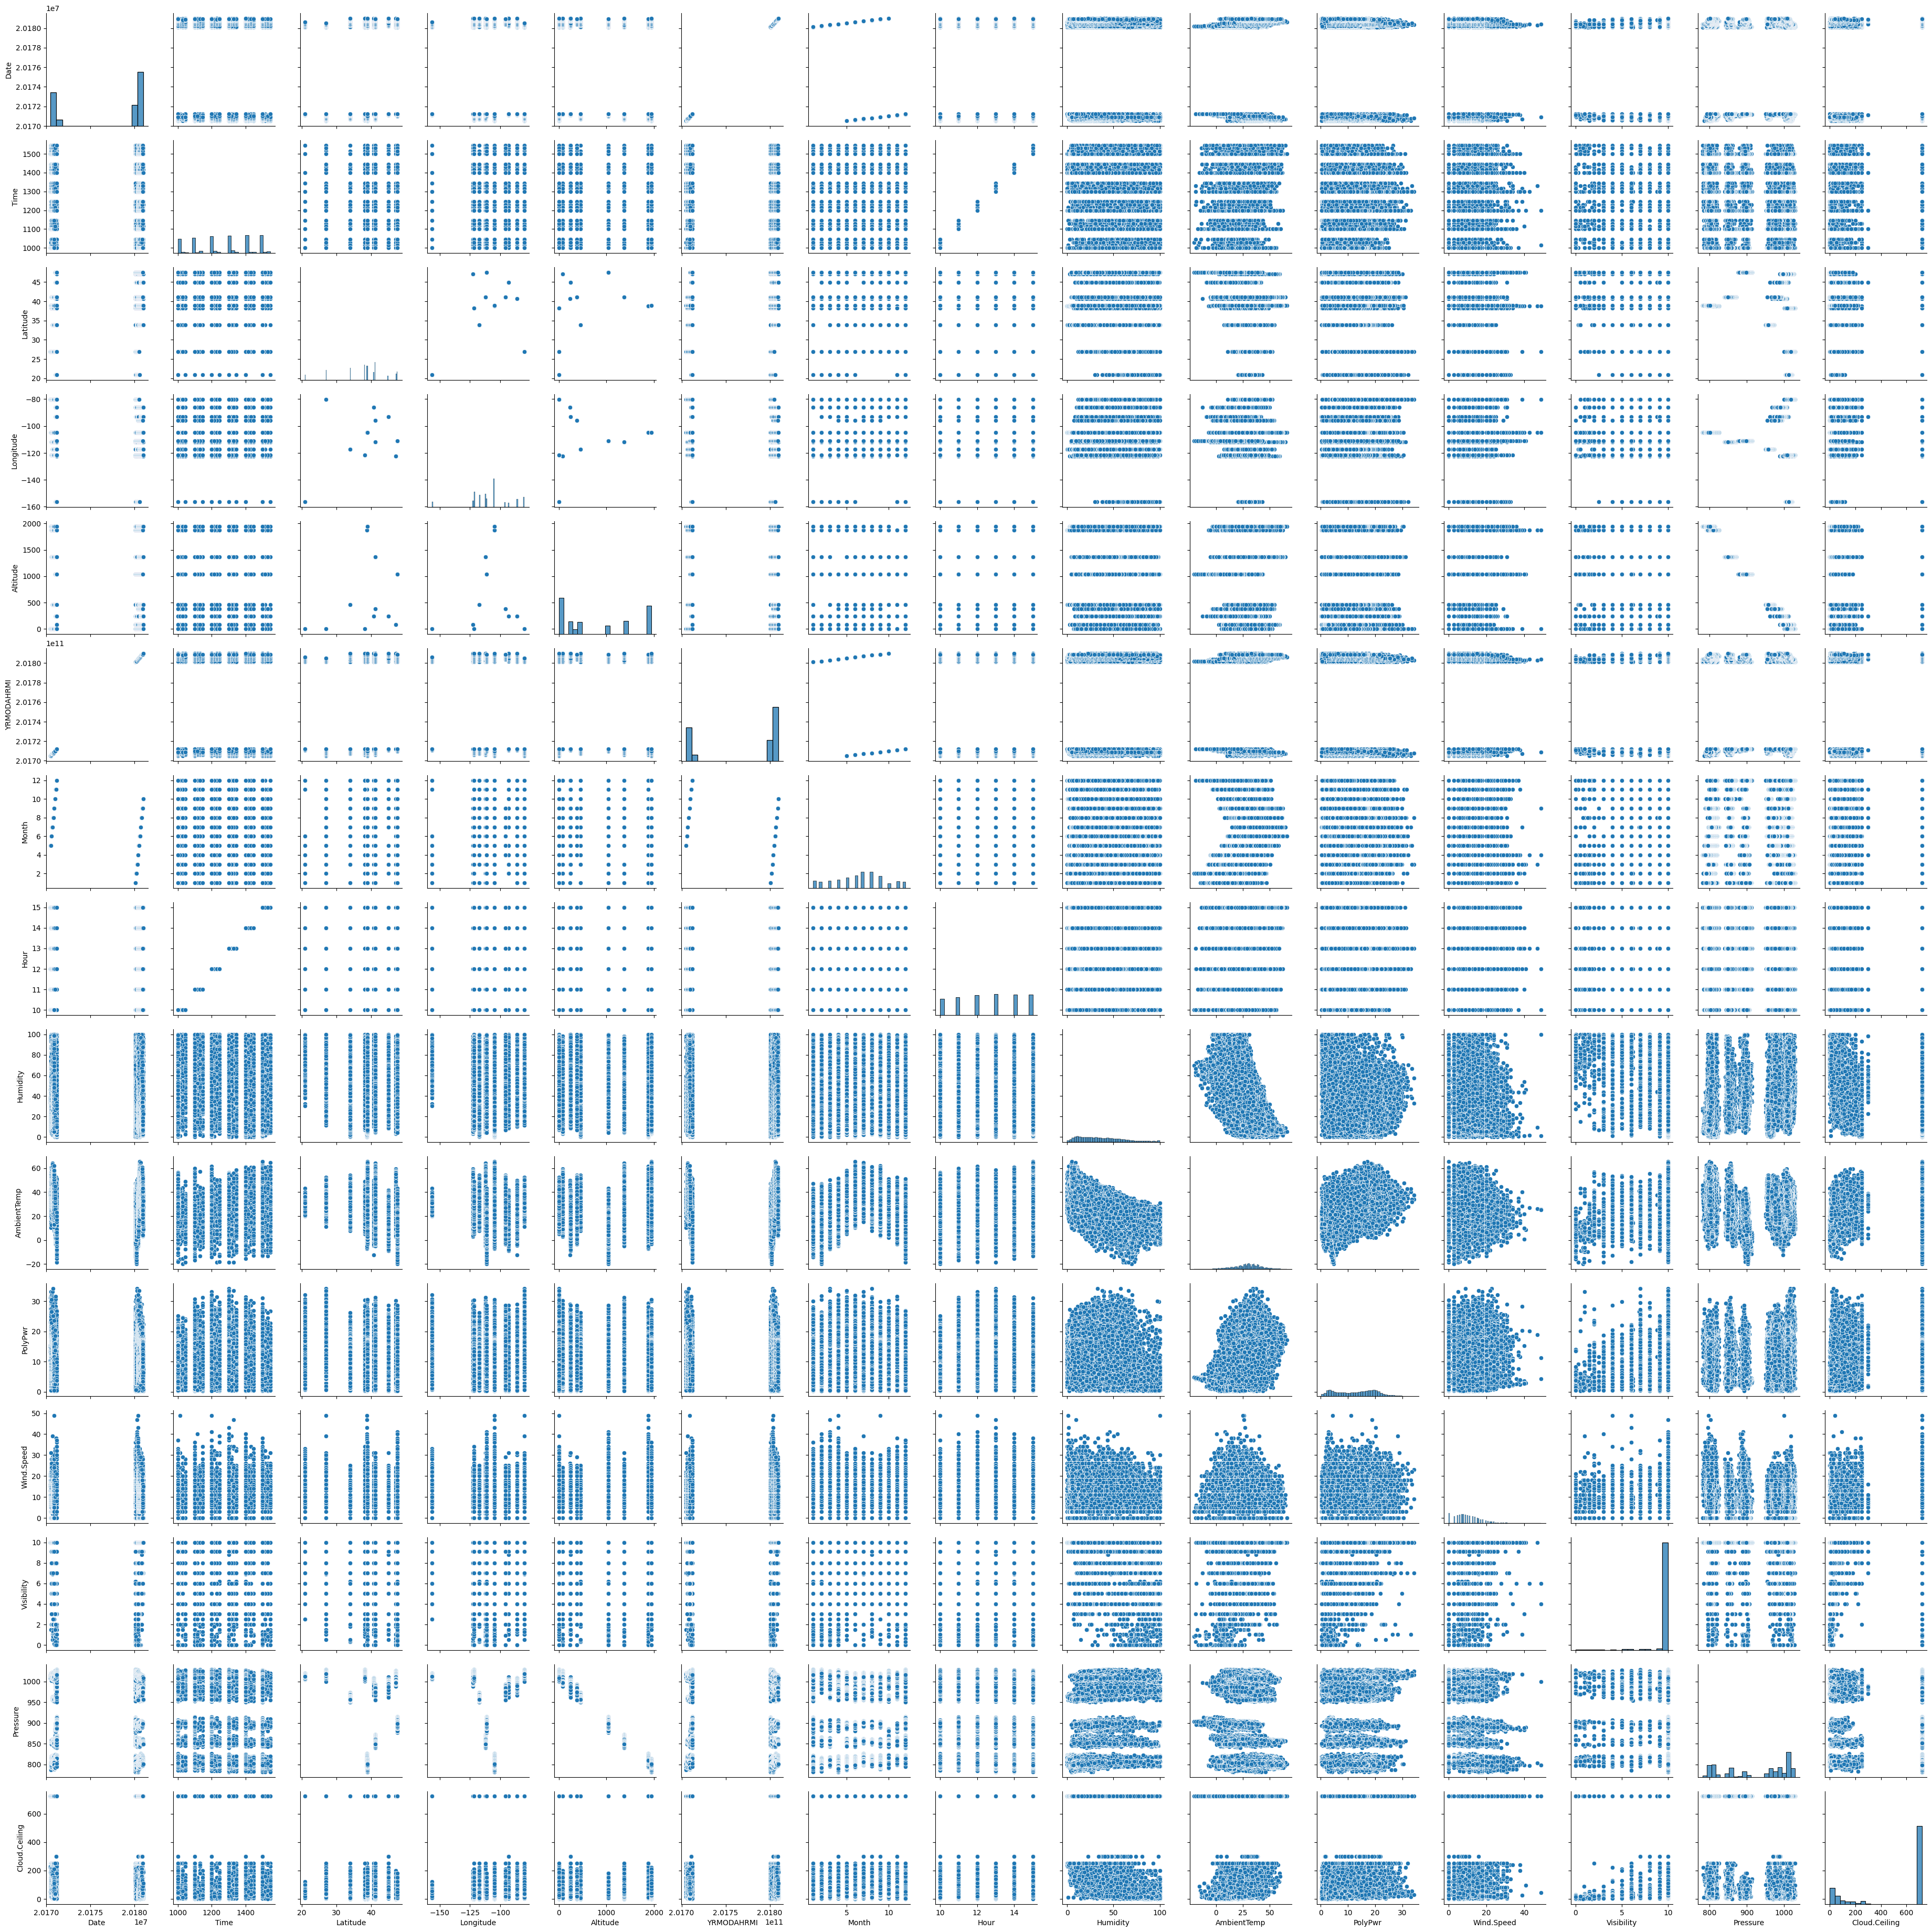

In [35]:
# trying to understand our dataset realtionships through pairplot from sns library
sns.pairplot(df)

<ipython-input-36-e85a9a0568d0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr();


Text(0.5, 1.0, 'Correlation analysis')

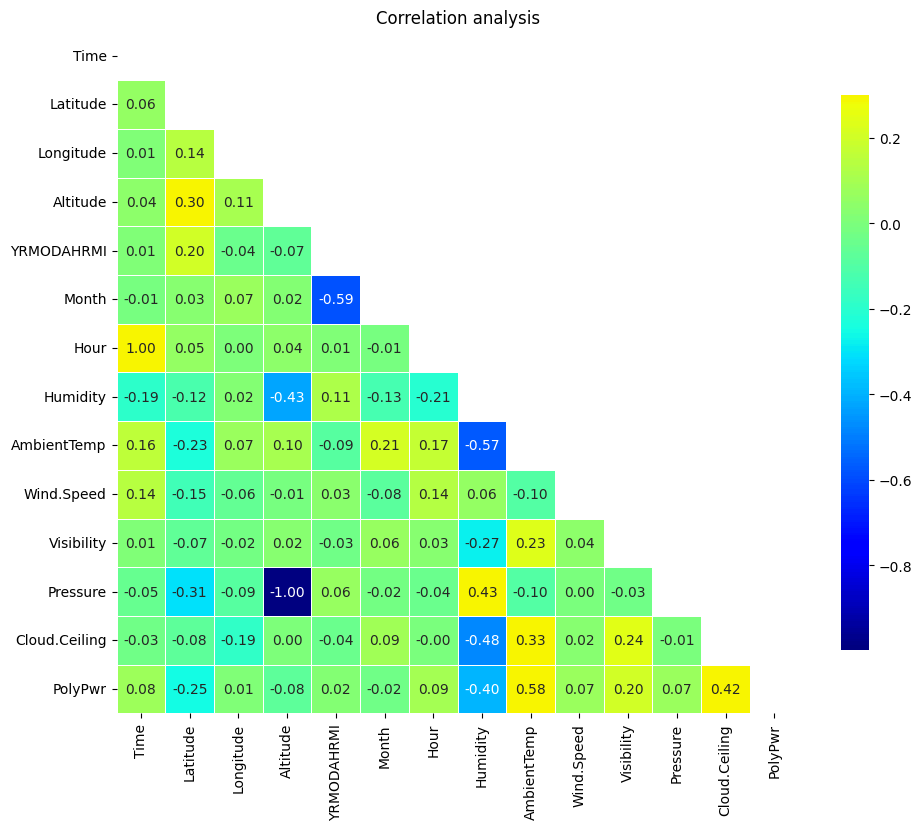

In [36]:
# doing correlatio analysis for specific number of features
df_correlation = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr();
mask = np.triu(np.ones_like(df_correlation, dtype=bool))
# plotting the correlation results using seaborn heatmap library
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_correlation, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis')

In [37]:
df["Location"]

0        Camp Murray
1        Camp Murray
2        Camp Murray
3        Camp Murray
4        Camp Murray
            ...     
21040          USAFA
21041          USAFA
21042          USAFA
21043          USAFA
21044          USAFA
Name: Location, Length: 21045, dtype: object

In [38]:
df["Location"].value_counts()

Travis         2746
Peterson       2640
USAFA          2573
Hill Weber     2384
March AFB      2204
JDMT           1779
Malmstrom      1517
Grissom        1487
Camp Murray    1113
Kahului         941
Offutt          881
MNANG           780
Name: Location, dtype: int64

In [39]:
df.groupby(["Location"])[['AmbientTemp','PolyPwr']].mean()

AmbientTemp    PolyPwr
Location                           
Camp Murray    30.450185  10.777723
Grissom        25.569657   9.426174
Hill Weber     30.022489  14.437151
JDMT           36.037962  18.574124
Kahului        29.211252  15.222645
MNANG          21.628888   9.996263
Malmstrom      15.766080   9.886024
March AFB      31.969279  13.761134
Offutt         28.680158  13.895667
Peterson       32.650353  11.517351
Travis         26.107134  13.296735
USAFA          33.741510  12.845495

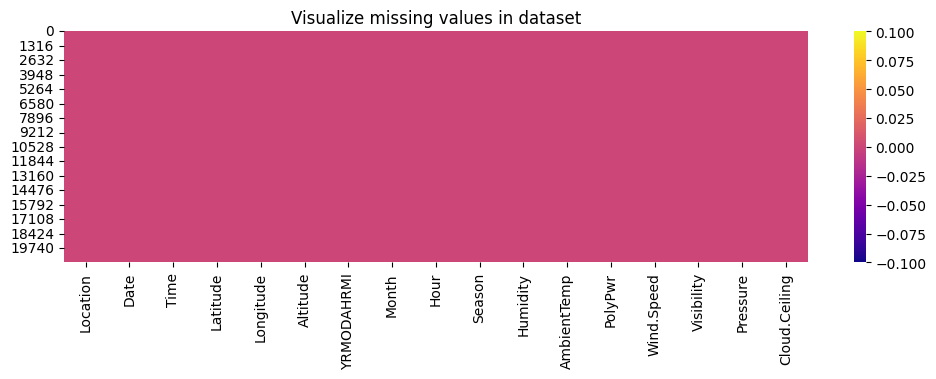

In [8]:
# checking for NaN values and trying to process all missing values
plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='plasma');
plt.title('Visualize missing values in dataset');

In [9]:
# Encode location data for ML models using get_dummies module
df_with_location_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)
df_with_loc_season_encoded = pd.get_dummies(df_with_location_encoded, columns=['Season'], drop_first=True)

# doing some analysis for cyclic features engineering rather than ordinary time specified in dataset
min_hour_interest = 10
max_hour_interest= 15

df_with_loc_season_encoded['delta_hr']= df_with_loc_season_encoded.Hour - min_hour_interest;

df_with_loc_season_encoded['sine_mon']= np.sin((df_with_loc_season_encoded.Month - 1)*np.pi/11)
df_with_loc_season_encoded['cos_mon']= np.cos((df_with_loc_season_encoded.Month - 1)*np.pi/11)
df_with_loc_season_encoded['sine_hr']= np.sin((df_with_loc_season_encoded.delta_hr*np.pi/(max_hour_interest - min_hour_interest)))
df_with_loc_season_encoded['cos_hr']= np.cos((df_with_loc_season_encoded.delta_hr*np.pi/(max_hour_interest - min_hour_interest)))


In [40]:
# It is seen that after reengineering features, we come up with 34 features including all encoded newly created features
df_with_loc_season_encoded.head(20)

Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  Hour  \
0   20171203  1145     47.11    -122.57        84  2.017120e+11     12    11   
1   20171203  1315     47.11    -122.57        84  2.017120e+11     12    13   
2   20171203  1330     47.11    -122.57        84  2.017120e+11     12    13   
3   20171204  1230     47.11    -122.57        84  2.017120e+11     12    12   
4   20171204  1415     47.11    -122.57        84  2.017120e+11     12    14   
5   20171204  1430     47.11    -122.57        84  2.017120e+11     12    14   
6   20171205  1115     47.11    -122.57        84  2.017120e+11     12    11   
7   20171205  1200     47.11    -122.57        84  2.017120e+11     12    12   
8   20171205  1300     47.11    -122.57        84  2.017120e+11     12    13   
9   20171205  1400     47.11    -122.57        84  2.017120e+11     12    14   
10  20171205  1500     47.11    -122.57        84  2.017120e+11     12    15   
11  20171206  1130     47.11    -122.57        84  2.017120e+11     12    11   
12  20171206  1200     47.11    -122.57        84  2.017120e+11     12    12   
13  20171206  1300     47.11    -122.57        84  2.017120e+11     12    13   
14  20171206  1400     47.11    -122.57        84  2.017120e+11     12    14   
15  20171206  1500     47.11    -122.57        84  2.017120e+11     12    15   
16  20171207  1200     47.11    -122.57        84  2.017120e+11     12    12   
17  20171207  1245     47.11    -122.57        84  2.017120e+11     12    12   
18  20171207  1300     47.11    -122.57        84  2.017120e+11     12    13   
19  20171207  1400     47.11    -122.57        84  2.017120e+11     12    14   

    Humidity  AmbientTemp  ...  Location_Travis  Location_USAFA  \
0   81.71997     12.86919  ...                0               0   
1   96.64917      9.66415  ...                0               0   
2   93.61572     15.44983  ...                0               0   
3   77.21558     10.36659  ...                0               0   
4   54.80347     16.85471  ...                0               0   
5   47.10083     18.12363  ...                0               0   
6   43.55469     19.41269  ...                0               0   
7   30.56641     23.90930  ...                0               0   
8   17.90771     32.32346  ...                0               0   
9   14.40430     35.41267  ...                0               0   
10  15.72876     32.91763  ...                0               0   
11  26.18408     25.84541  ...                0               0   
12  23.71216     27.76642  ...                0               0   
13  15.93628     36.06476  ...                0               0   
14  16.70532     34.82101  ...                0               0   
15  13.39111     39.30000  ...                0               0   
16  83.30078      8.36250  ...                0               0   
17  82.89795      7.17163  ...                0               0   
18  82.08618      7.72049  ...                0               0   
19  72.70508      9.70192  ...                0               0   

    Season_Spring  Season_Summer  Season_Winter  delta_hr      sine_mon  \
0               0              0              1         1  5.665539e-16   
1               0              0              1         3  5.665539e-16   
2               0              0              1         3  5.665539e-16   
3               0              0              1         2  5.665539e-16   
4               0              0              1         4  5.665539e-16   
5               0              0              1         4  5.665539e-16   
6               0              0              1         1  5.665539e-16   
7               0              0              1         2  5.665539e-16   
8               0              0              1         3  5.665539e-16   
9               0              0              1         4  5.665539e-16   
10              0              0              1         5  5.665539e-16   
11              0  

In [57]:
# for modelling purpose, selected columns will be only processed for further analysis for specific location
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 'Location_Grissom',
                     'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
                     'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
                     'Location_Offutt', 'Location_Peterson', 'Location_Travis',
                     'Location_USAFA','Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

df_desired = df_with_loc_season_encoded[selected_columns].reset_index(drop=True)
target_label = 'PolyPwr';
input_feat = list(set(selected_columns).difference(set([target_label])))
df_X = df_desired[input_feat].reset_index(drop=True)
df_Y = df_desired[target_label]
print(df_Y.shape)
print(df_X.shape)
# splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42);
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21045,)
(21045, 25)
(16836, 25)
(16836,)
(4209, 25)
(4209,)


In [11]:
# Neural network configuration model setup
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Conv1D, ReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import backend as K

tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(),
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [12]:
# building our model function using Squential Keras API
def dl_model(n_units1, n_units2, n_units3, act1, act2, act3, ker_init, lr, dr0, dr1, dl_loss):
    model = Sequential()
    model.add(Dense(n_units1, activation=act1, kernel_initializer=ker_init, input_dim=X_train.shape[1]))
    # model.add(Dense(n_units1, activation=act1, kernel_initializer=ker_init))
    model.add(Dropout(dr0))
    model.add(Dense(n_units2, activation=act2, kernel_initializer=ker_init))
    model.add(Dropout(dr1))
    model.add(Dense(n_units3, activation=act3, kernel_initializer=ker_init))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=[r_squared, tf.keras.metrics.mean_squared_error], loss=dl_loss)
    return model

In [13]:
def custom_loss(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return SS_res/(SS_tot+K.epsilon())

# r_squared metric for deep learning model implementation
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))



In [66]:

# Scale training data and configure pipline for knn model
estimators = []
estimators.append(('minmax', MinMaxScaler()))
estimators.append(('knn', KNeighborsRegressor()))
knn_pipeline = Pipeline(estimators)


In [48]:
dl_best_params = {'kr__n_units3':320,
                    'kr__n_units2':240,
                    'kr__n_units1':280,
                    'kr__lr':0.001,
                    'kr__ker_init':tf.keras.initializers.GlorotUniform(seed=32),
                    'kr__epochs':70,
                    'kr__dr1':0.1,
                    'kr__dr0':0.1,
                    'kr__dl_loss':custom_loss,
                    'kr__batch_size':600,
                    'kr__act3':'tanh',
                    'kr__act2':'relu',
                    'kr__act1':'relu',
                    'kr__verbose':0}

rf_best_params={
    'n_estimators': 1800,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 20,
    'bootstrap': True}

knn_best_params={
    'knn__weights': 'distance',
    'knn__p': 2,
    'knn__n_neighbors': 15,
    'knn__leaf_size': 30,
    'knn__algorithm': 'ball_tree'}

lgbm_best_params={
    'objective': 'rmse',
    'num_leaves': 1400,
    'n_estimators': 900,
    'max_depth': 11,
    'learning_rate': 0.008,
    'feature_fraction': 0.6}


dl_model = pipeline.set_params(**dl_best_params)
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)
pknn_model = knn_pipeline.set_params(**knn_best_params)
lgbm_model = LGBMRegressor(**lgbm_best_params)

In [52]:
# fitting specific models on train data and for further analysis

rf_model.fit(X_train, y_train)
# lgbm_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1800, random_state=42)

In [56]:
dl_model.fit(X_train, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('kr',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x787e4575f520>)])

In [58]:
knn_model.fit(X_train, y_train)


Pipeline(steps=[('minmax', MinMaxScaler()),
                ('knn',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=15,
                                     weights='distance'))])

In [27]:
# checking our model for predictions on test data
y_pred = dl_model.predict(X_test)

In [28]:
# Explained variance
print(explained_variance_score(y_test.ravel(), y_pred))
# R2 score
print(r2_score(y_test.ravel(), y_pred))
# Mean absolute error
print(mean_absolute_error(y_test.ravel(), y_pred))
# Root mean square error
print(np.sqrt(mean_squared_error(y_test.ravel(), y_pred)))
print(mean_absolute_percentage_error(y_test.ravel(), y_pred)*100)

0.6636595533285929
0.662870094560389
2.7194803725397123
4.138401901814689
50.0192562858794


In [53]:
# feature important analysis
rf_model.feature_importances_
# Calculate scaled feature importance as a percentage
feat_imp_score = (rf_model.feature_importances_/max(rf_model.feature_importances_)*100).tolist()
feature_ranking_with_score = dict(sorted(zip(feat_imp_score, input_feat), reverse=True))

# observing that termparture has the highest importance, which is normally as PV depends mainly on solar irradiance.
feature_ranking_with_score



{100.0: 'AmbientTemp',
 56.226486339828426: 'Humidity',
 52.33159427617507: 'Cloud.Ceiling',
 28.611078191959532: 'Pressure',
 26.981257938233334: 'sine_mon',
 22.207250797967696: 'Latitude',
 20.43798623726164: 'cos_mon',
 16.21236526727515: 'cos_hr',
 15.031840232388488: 'Wind.Speed',
 11.42478238821208: 'sine_hr',
 11.275545364480772: 'Location_JDMT',
 10.856370595300904: 'Season_Winter',
 7.0205268746893275: 'Season_Summer',
 6.212684432853945: 'Season_Spring',
 3.8784117937900096: 'Visibility',
 3.0757838434419904: 'Location_Hill Weber',
 2.2794178104367133: 'Location_Grissom',
 2.242642117818545: 'Location_USAFA',
 1.8992593661054369: 'Location_Kahului',
 1.8567404856486673: 'Location_Peterson',
 1.7428699674942219: 'Location_Travis',
 1.536071222426889: 'Location_Malmstrom',
 1.0209240129309758: 'Location_March AFB',
 0.9618922933579908: 'Location_Offutt',
 0.9320228435824892: 'Location_MNANG'}

In [70]:
# define meta-learner model
base_model = list()
# base_model.append(('dl', dl_model))
# base_model.append(('lgbm', lgbm_model))
base_model.append(('rf', rf_model))
base_model.append(('knn', knn_model))

base1 = LinearRegression()
# using StackingRegressor for gathering all models
stacked_model = StackingRegressor(estimators=base_model, final_estimator=base1, cv=4, passthrough=True)



In [71]:
# Fit the model on the training data
stacked_model.fit(X_train, y_train)


StackingRegressor(cv=4,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=20,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=1800,
                                                     random_state=42)),
                              ('knn',
                               Pipeline(steps=[('minmax', MinMaxScaler()),
                                               ('knn',
                                                KNeighborsRegressor(algorithm='ball_tree',
                                                                    n_neighbors=15,
                                                                    weights='distance'))]))],
                  final_estimator=LinearRegression(), passthrough=True)

In [72]:
# making predictions on test data
y_pred = stacked_model.predict(X_test)

# Evaluate model performance
print(explained_variance_score(y_test.ravel(), y_pred))
# R2 score
print(r2_score(y_test.ravel(), y_pred))
# Mean absolute error
print(mean_absolute_error(y_test.ravel(), y_pred))
# Root mean square error
print(np.sqrt(mean_squared_error(y_test.ravel(), y_pred)))
print(mean_absolute_percentage_error(y_test.ravel(), y_pred)*100)

0.6740432744423722
0.674038834979511
2.7307594383001916
4.06927421282294
50.02856757907783
